# Titanic - 20:03 10/10/2025


## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition homepage: https://www.kaggle.com/competitions/titanic

#### The ultimate goal: 
- Understand the dataset
- Create a model that could achieve Kaggle score of 0.8

**Evaluation metric**: Accuracy rate.

#### Hypothesis:
I believe that the two main information that affect greatly on survival probability is passenger's **gender** and **age**.

## Preparation

### Import necessary libraries

In [1]:
# turn off warning
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load train.csv file

In [2]:
# titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic = pd.read_csv('../input/train.csv')
df = titanic.copy()
test_dataset = pd.read_csv('../input/test.csv')
df_test = test_dataset.copy()
print("Successfully load training data.")

Successfully load training data.


## Have a look at the dataset

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Base on the output, we could say that there are 891 rows and  12 variables inside the train dataset:
- **Survived**: Survival (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex: Sex (male/female)
- Age: Age in years	
- Sibsp: # of siblings / spouses aboard the Titanic	
- Parch: # of parents / children aboard the Titanic	
- Ticket: Ticket number	
- Fare: Passenger fare	
- Cabin: Cabin number	
- Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

For the test dataset, there are 418 rows and 11 variables (without `Survived` variable).

Base on the `df.info()`, we could say there are 7 numeric variables and 5 object variables, with `Survived` being the outcome of the model. We might have to transform these object variables in a way that model can understand itself.

We can see that `Age`, `Cabin` and `Embarked` in train dataset and `Age`, `Cabin` and `Fare` in test dataset have missing values, we will explore number of missing value and it's proportion.

Look at the features information, there are four categorical variables, we will convert it into `category` type to implement analysis better.

In [5]:
for x in ['Pclass', 'Sex', 'Embarked']:
    df[x] = df[x].astype('category')
    df_test[x] = df_test[x].astype('category')
df['Survived'] = df['Survived'].astype('category')

In [6]:
print("===== Number of missing values (train dataset) =====\n")
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum())
print('\n')
print("===== Number of missing values (test dataset) =====\n")
print(df_test[['Age', 'Cabin', 'Fare']].isnull().sum())

===== Number of missing values (train dataset) =====

Age         177
Cabin       687
Embarked      2
dtype: int64


===== Number of missing values (test dataset) =====

Age       86
Cabin    327
Fare       1
dtype: int64


In [7]:
print("===== Percentage of missing values on train dataset =====\n")
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum() / len(df) * 100)
print('\n')
print("===== Percentage of missing values on test dataset =====\n")
print(df_test[['Age', 'Cabin', 'Fare']].isnull().sum() / len(df_test) * 100)

===== Percentage of missing values on train dataset =====

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


===== Percentage of missing values on test dataset =====

Age      20.574163
Cabin    78.229665
Fare      0.239234
dtype: float64


The `Cabin` has lots of missing data, so we might need to find a way to handle it later.

We should also check if any rows inside the dataset duplicate each other in order to deal with it as these could affect negatively on training length.

In [8]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


There are no duplicate rows in the dataset, which is good.

We want to check it's uniqueness of each column.

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

From the result, we could see that some features do have lots of unique values, but some features (`Survived`, `Pclass`, `Sex`, `Embarked`) only have 2 - 3 different values, as it is categorical (we don't count `SibSp`, `Parch` here because it makes sense).

## Handle missing value

We need to find solutions to handle missing value.
From the output detecting missing value, here's the proportion of missing value for `Age`, `Cabin`, and `Embarked` in train dataset:

- Age: 19.87%
- Cabin: 77.10%
- Embarked: 0.22%

For test dataset, here's the proportion of missing value for `Age`, `Cabin`, and `Fare`:
- Age: 20.57%
- Cabin: 78.23%
- Fare: 0.24%

For `Cabin` features, although the missing value percentage are pretty high, it could be a good information to show passenger's room level, which is a really crucial detail related to survivability. Furthermore, we can base on that information to know if the passengers stayed at the front part (bow) of the Titanic, which is the part of the ship that sank first.

For `Age` features, it could related to the survivability, as children and elderly usually be prioritized.

For `Embarked` features, it could related to passenger's room level (passengers go on the ship first might have room that are in higher level).

Because of that, I think that we should not remove these features. We need to handle value instead.

For testing dataset, we also have missing value in `Fare` feature. We will handle it.

### Handle missing age value

Honorific title inside passengers' name could tell us a little about their age.

At first, we splited value `Age` into 5 main groups: Mr, Mrs, Master, Miss, and other in order to not only impute missing values but also capture potential age-related patterns.

But after looking at survivability rate of each group, we decided not to complicate things and just impute missing value with median age of the whole dataset. Except for `Master` group, we will impute missing value with median age of this group as title "Master" is only for people under 12.

In [10]:
master = df['Name'].str.contains(r',\s*Master.', regex=True)
df_master = df[master].copy()

mean_age = df['Age'].mean()
mean_age_master = df_master['Age'].mean()

df_master['Age'] = df_master['Age'].fillna(mean_age_master)
df[master] = df_master

df['Age'] = df['Age'].fillna(mean_age)
df_test['Age'] = df_test['Age'].fillna(mean_age)

### Handle missing values from Cabin, Embarked (train dataset) and Fare (test dataset)

Perhaps the only features that we could use to guess people's cabin is Ticket number, but since there are no ticket number system, we could not conclude anything from that.

At first, I thought it would be possible to fill missing `Cabin` value by looking at passengers' ticket class, fare, and embarked point, but after some research, I found out that there is no clear relationship between these features and `Cabin` value.

Therefore, I will just remove the `Cabin` feature, as it has too many missing values and we could not find a way to fill them.

As for Embarked value, I will choose "S" to fill that, as the primary embarked point was Southampton (Titanic trip started from there)

As for Fare value in testing dataset, I will fill it with median of Fare value.

In [11]:
df = df.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

df['Embarked'] = df['Embarked'].fillna("S")
df_test['Embarked'] = df_test['Embarked'].fillna("S")

fare_mean = df['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(fare_mean)

In [12]:
print("===== Percentage of missing values =====")
df[['Age', 'Embarked']].isnull().sum() / len(df) * 100

===== Percentage of missing values =====


Age         0.0
Embarked    0.0
dtype: float64

## EDA Analysis

EDA Analysis is a very important part in order to understand the dataset. Throughout the analysis we could understand the pattern between variables, it's distribution, skewness,... From that, we can come up with solution to enhance accuracy of the model.

### Univariate Analysis for Numeric data

#### Descriptive statistics

In [13]:
df.describe().apply(lambda x: x.apply('{: .2f}'.format))

,PassengerId,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00
mean,446.00,29.59,0.52,0.38,32.20
std,257.35,13.11,1.10,0.81,49.69
min,1.00,0.42,0.00,0.00,0.00
25%,223.50,22.00,0.00,0.00,7.91
50%,446.00,29.70,0.00,0.00,14.45
75%,668.50,35.00,1.00,0.00,31.00
max,891.00,80.00,8.00,6.00,512.33


From the output, we could see there are lots of figures generated:

- **Count**: Shows the number of non-null values in each column.
- **Mean**: Indicates the average value for each numerical column.
- **Std**: The standard deviation, representing how spread out the values are from the mean.
- **Min** & **Max**: Show the minimum and maximum values, thus giving the range of the data (range = max - min).
- **25%** (Q1), **50%** (Median), **75%** (Q3): These are the quartiles. The 50% is the median. These give insights into how the data is distributed (e.g. symmetric, skewed).

Distribution/Spread: If the mean and median (50%) are close, the distribution is fairly symmetric; if not, the data may be skewed.

The skewness of variable's distribution
- PassengerId: Not skewed (mean = median)
- Age: Not skewed (mean nearly equals median)
- SibSp: Unsure (mean nearly equals median, but the min and max value are too separate)
- Parch: Unsure (mean nearly equals median, but the min and max value are too separate)
- Fare: Skewed (mean = 32.20, while median = 14.45)

#### Check duplicate values

In [14]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


#### Density plot

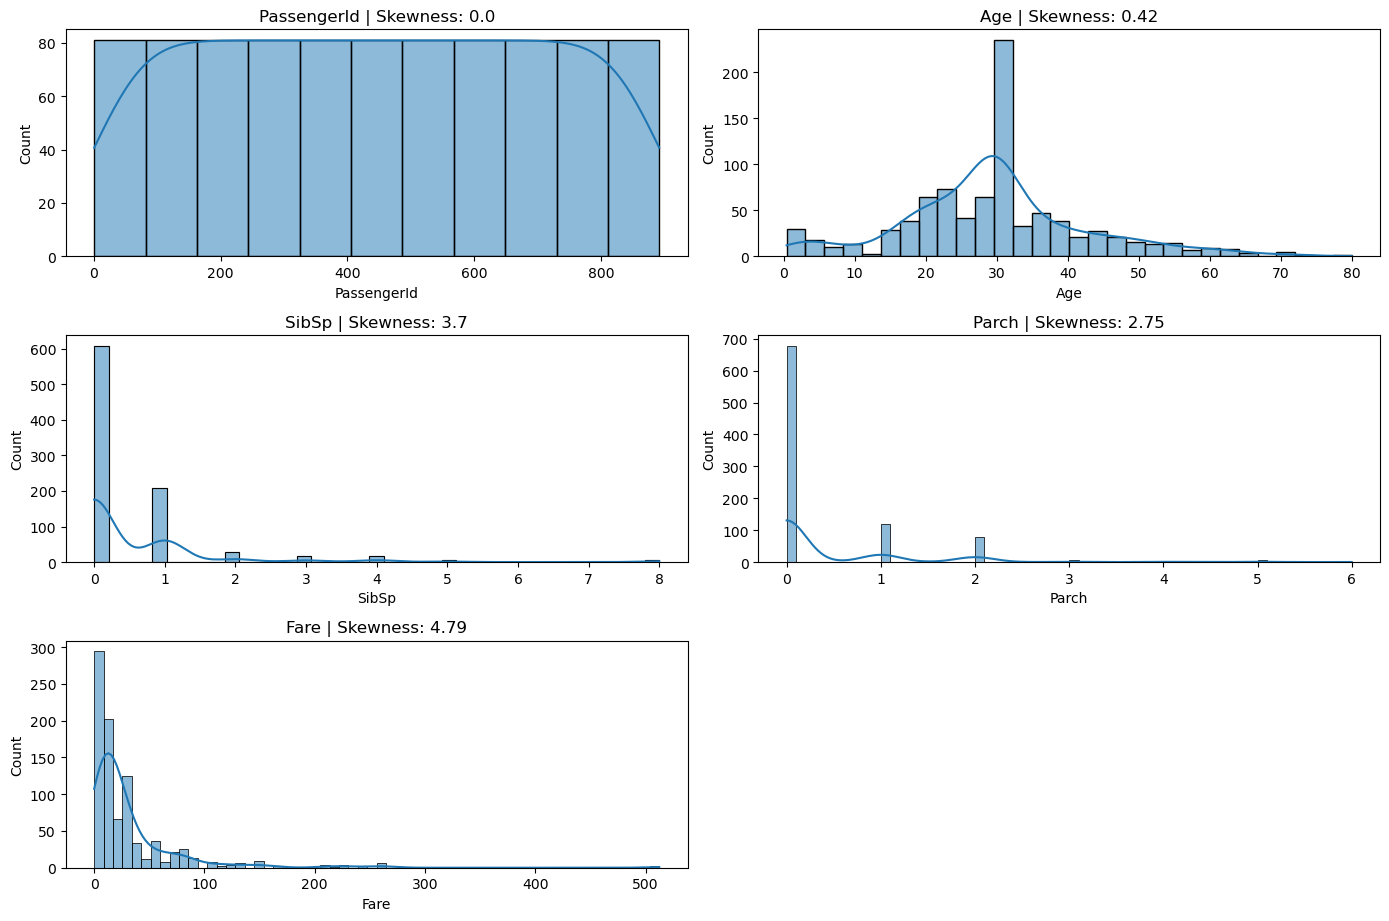

In [15]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Boxplot

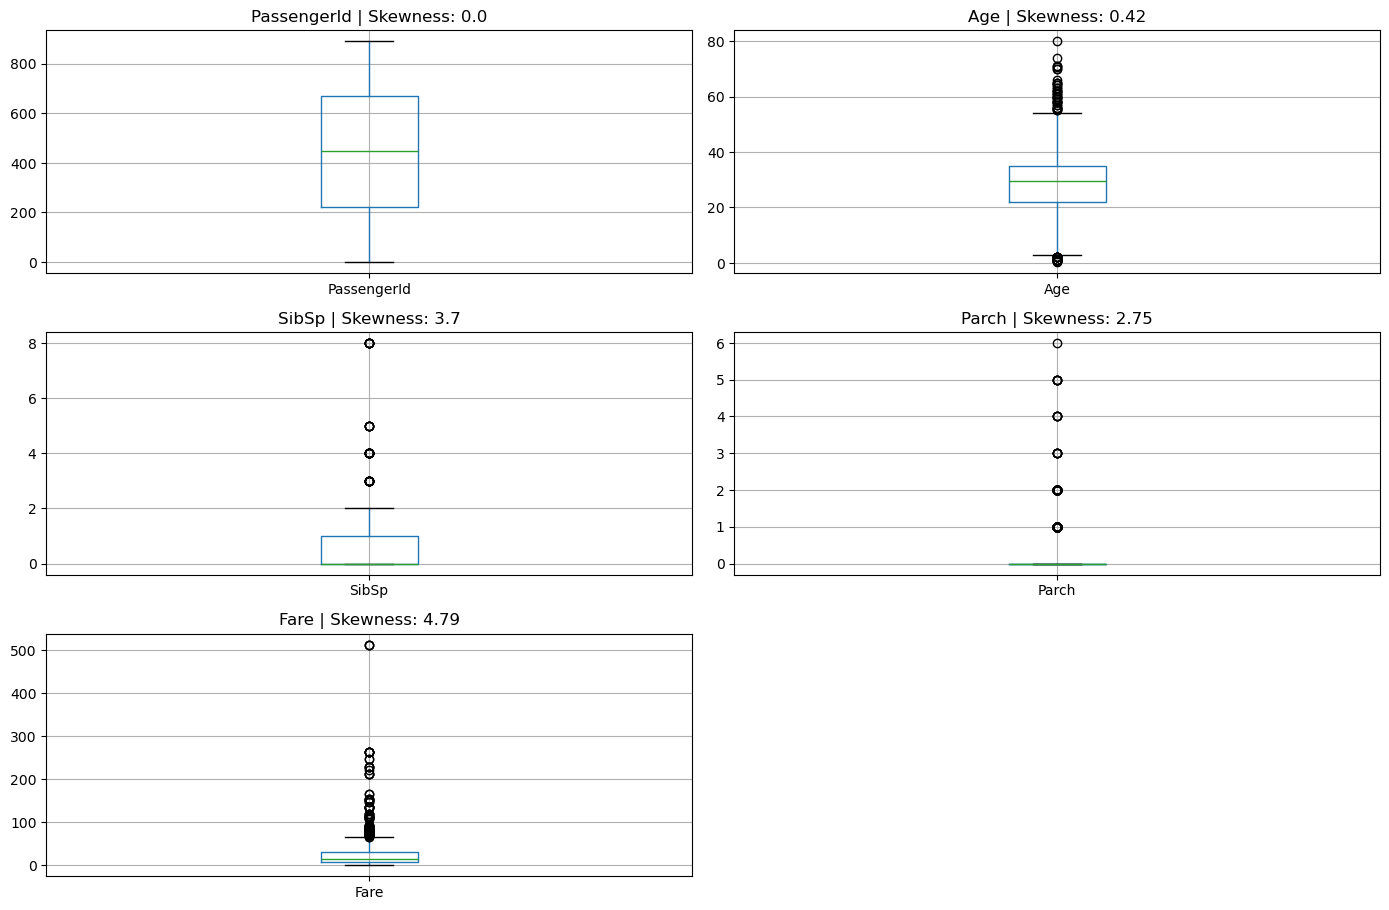

In [16]:
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    df.boxplot(column=feature)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Comment

As we can see from the Density plot and Boxplot, clearly `SibSp`, `Parch`, and `Fare` have very high skewness. Moreover, four out of five variables have outlier values. Although some of the outliers are quite necessary (SibSp and Parch), the graph suggests that we should do something to handle that problem.

### Univariate Analysis for Categorical variables

#### Countplot

Let start by showing distribution of these variables.

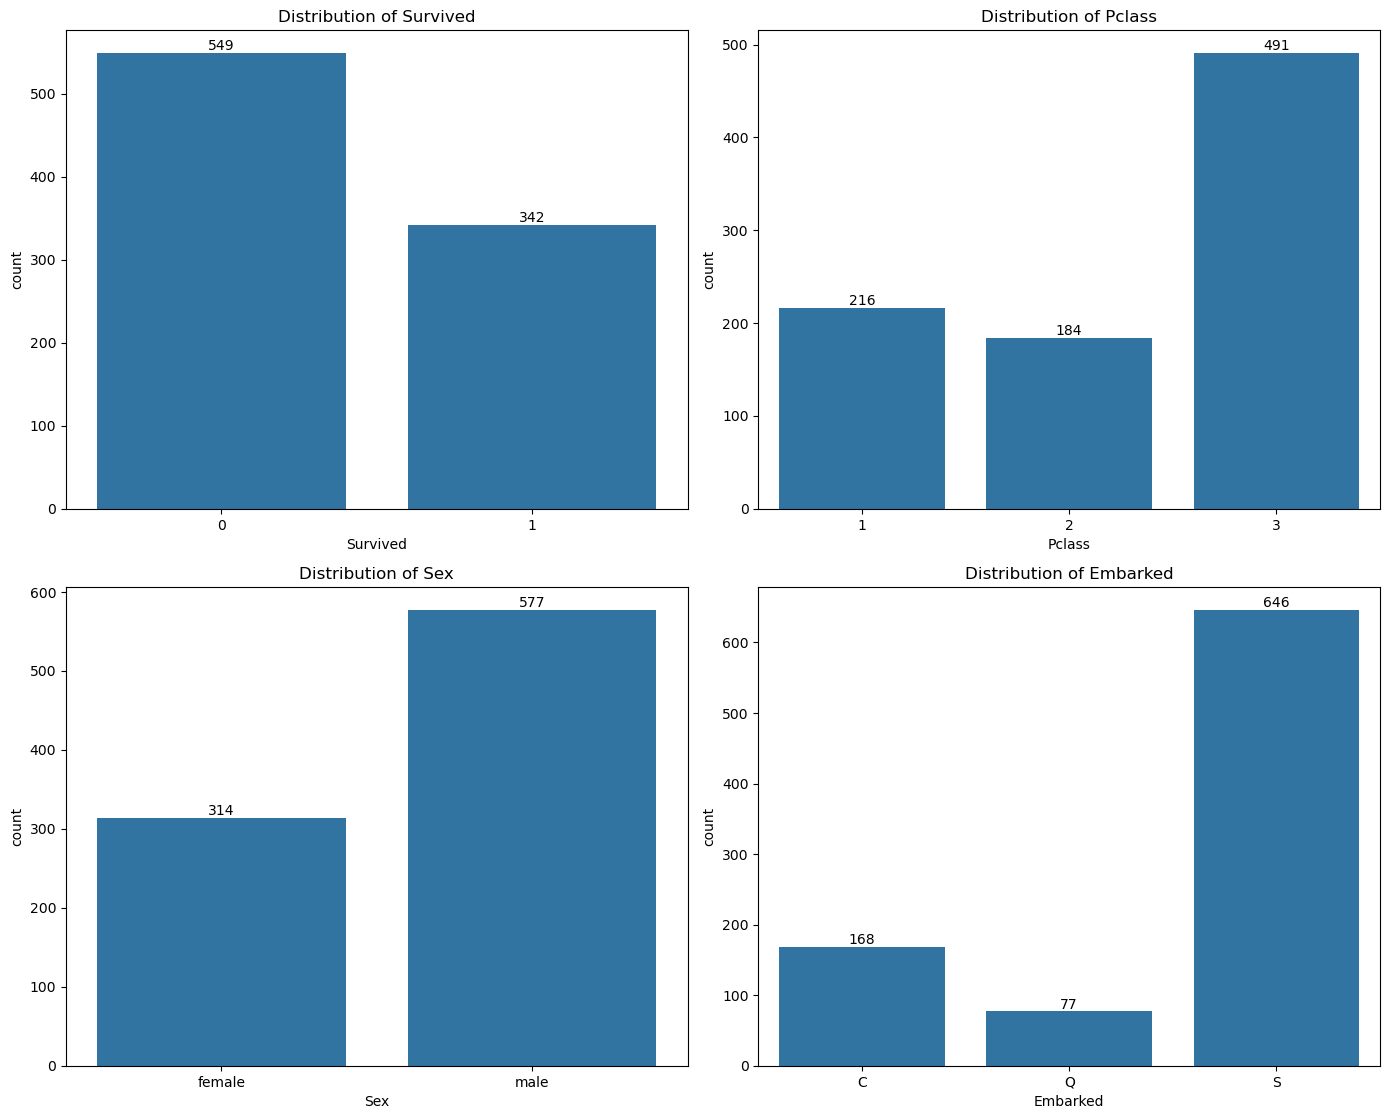

In [17]:
categorical_columns = df.select_dtypes(include=["category"]).columns
plt.figure(figsize=(14, len(categorical_columns) * 3 + 10))
for idx, feature in enumerate(categorical_columns, 1):
    # print(feature)
    plt.subplot(len(categorical_columns), 2, idx)
    sns.countplot(data=df, x=feature)
    plt.title('Distribution of ' + feature)
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

- 549 passenger did not survive from the Titanic disaster, and 342 passenger survived. The dataset is not very balance in terms of outcome.
- The majority of passenger registered third class.
- Two thirds of the passengers were male.
- Most of passengers got on board at Southampton.
- Inside the dataset, only 204 passengers have Cabin value.

### Bivariate Analysis

To check if my hypothesis is correct, I will check survivability mainly on `Age` and `Sex` first.

#### Survivability of passengers base on age and gender

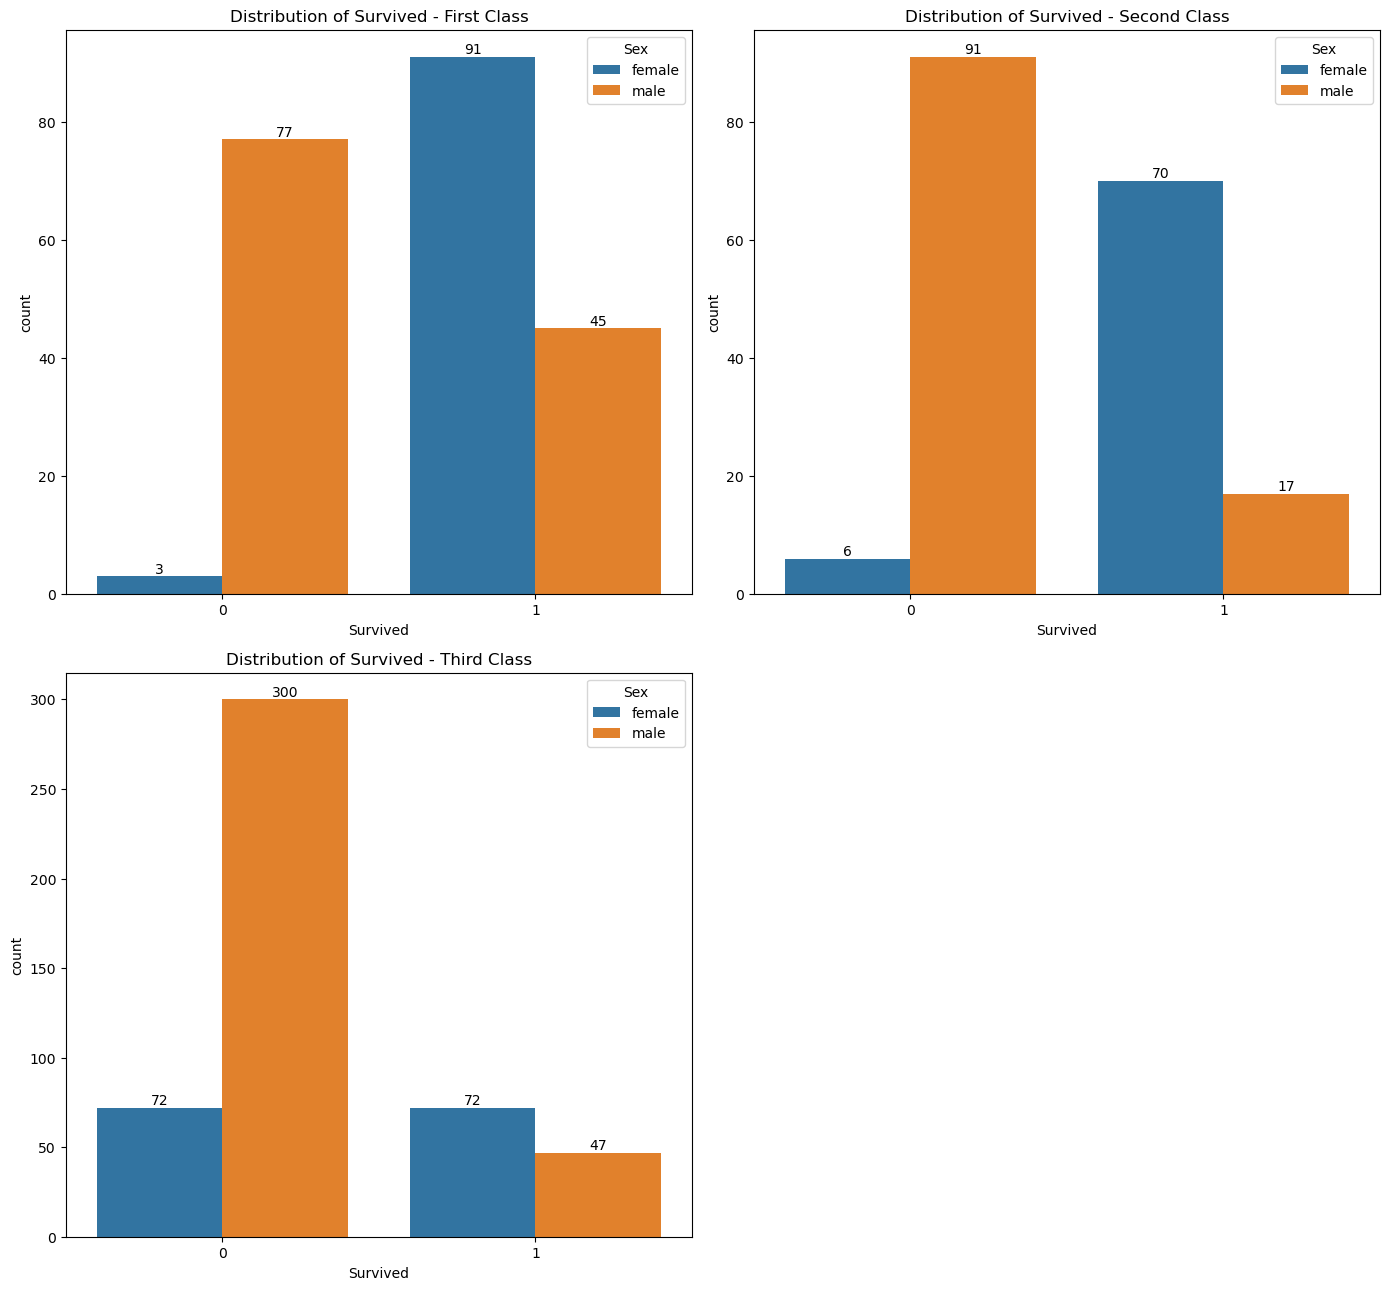

In [18]:
first_class = df['Pclass'].apply(lambda x: x == 1)
second_class = df['Pclass'].apply(lambda x: x == 2)
third_class = df['Pclass'].apply(lambda x: x == 3)

df_list = [first_class, second_class, third_class]
names = ["First Class", "Second Class", "Third Class"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Sex')
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()


#### Survivability of passengers base on Pclass

It could be true that high class passenger had higher survival probability, we will check that as well.

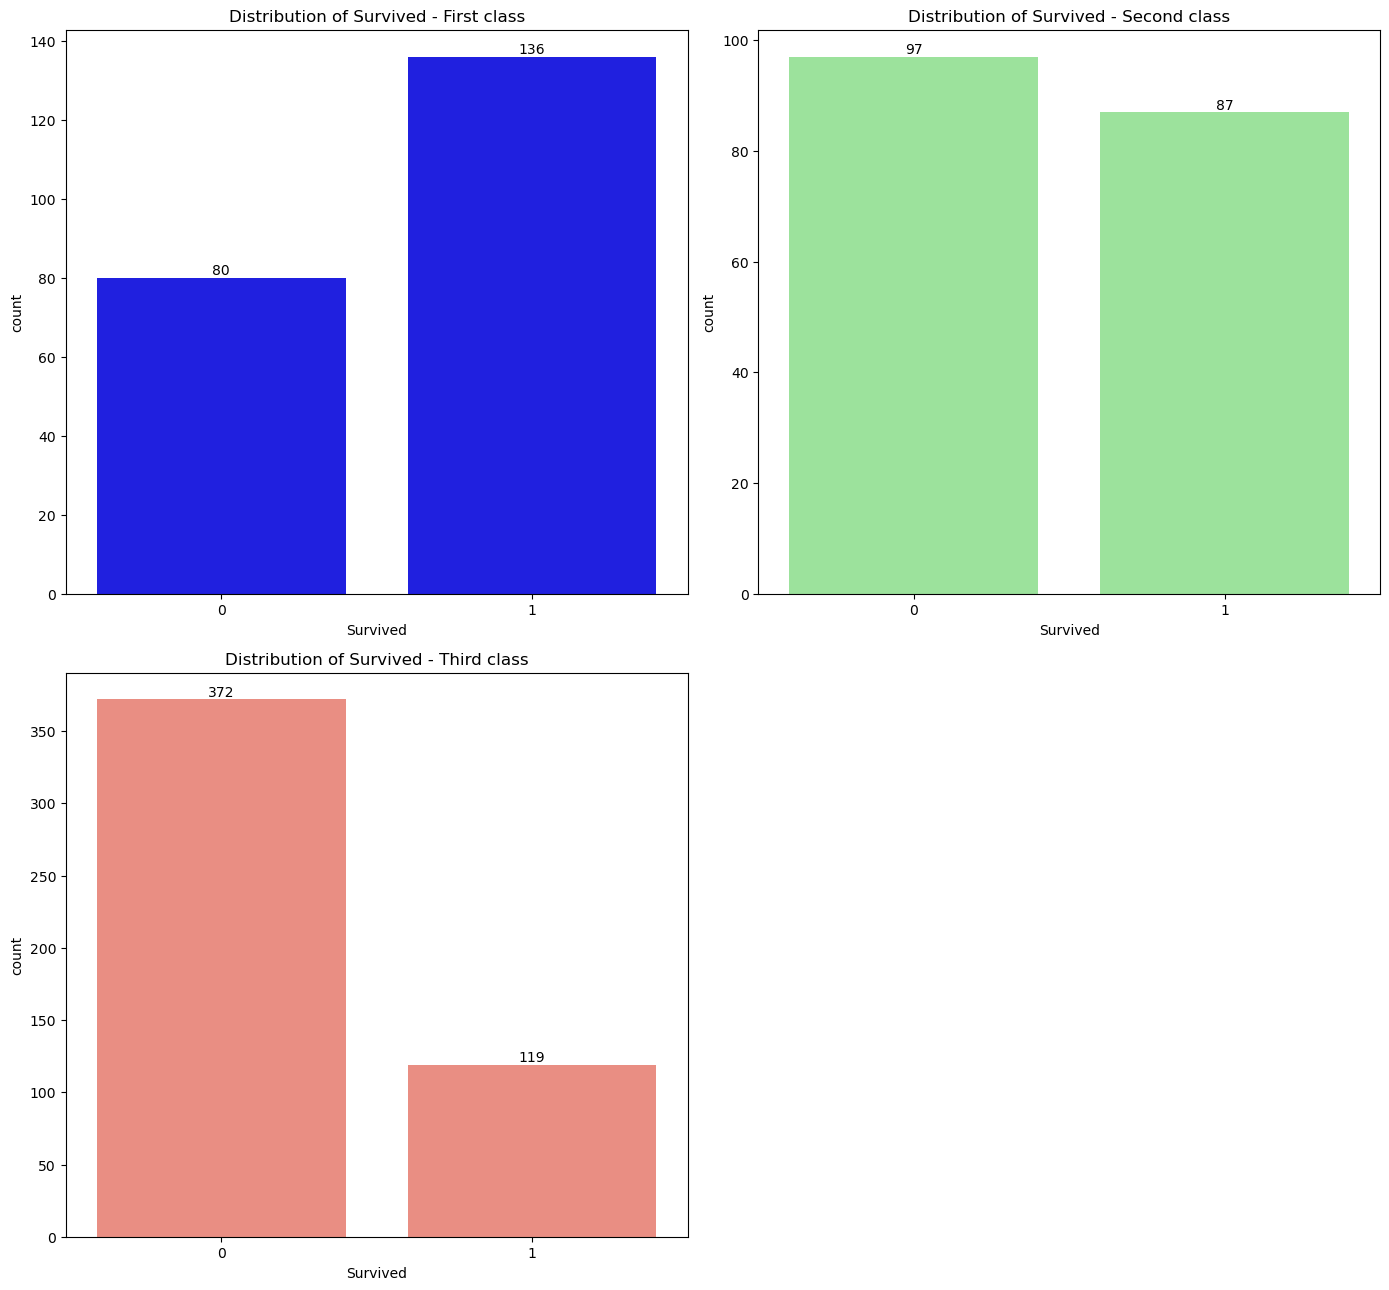

In [19]:
first_class = df["Pclass"].apply(lambda x: x == 1)
second_class = df["Pclass"].apply(lambda x: x == 2)
third_class = df["Pclass"].apply(lambda x: x == 3)

df_list = [first_class, second_class, third_class]
names = ["First class", "Second class", "Third class"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))

# each graph have specific color
colors = ['blue', 'lightgreen', 'salmon']
for idx, (feature, name, color) in enumerate(zip(df_list, names, colors), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', color=color)
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

The percentage of survival in each class, sorted by order: First class (63%), Second class (47%), Third class (24%)

- Male always have lower percentage of survivability in all three classes
- Women's percentage of survivability is 74.2%, while male's is only 19% (109 survived out of 577)

#### Survivability of passengers base on age and Pclass

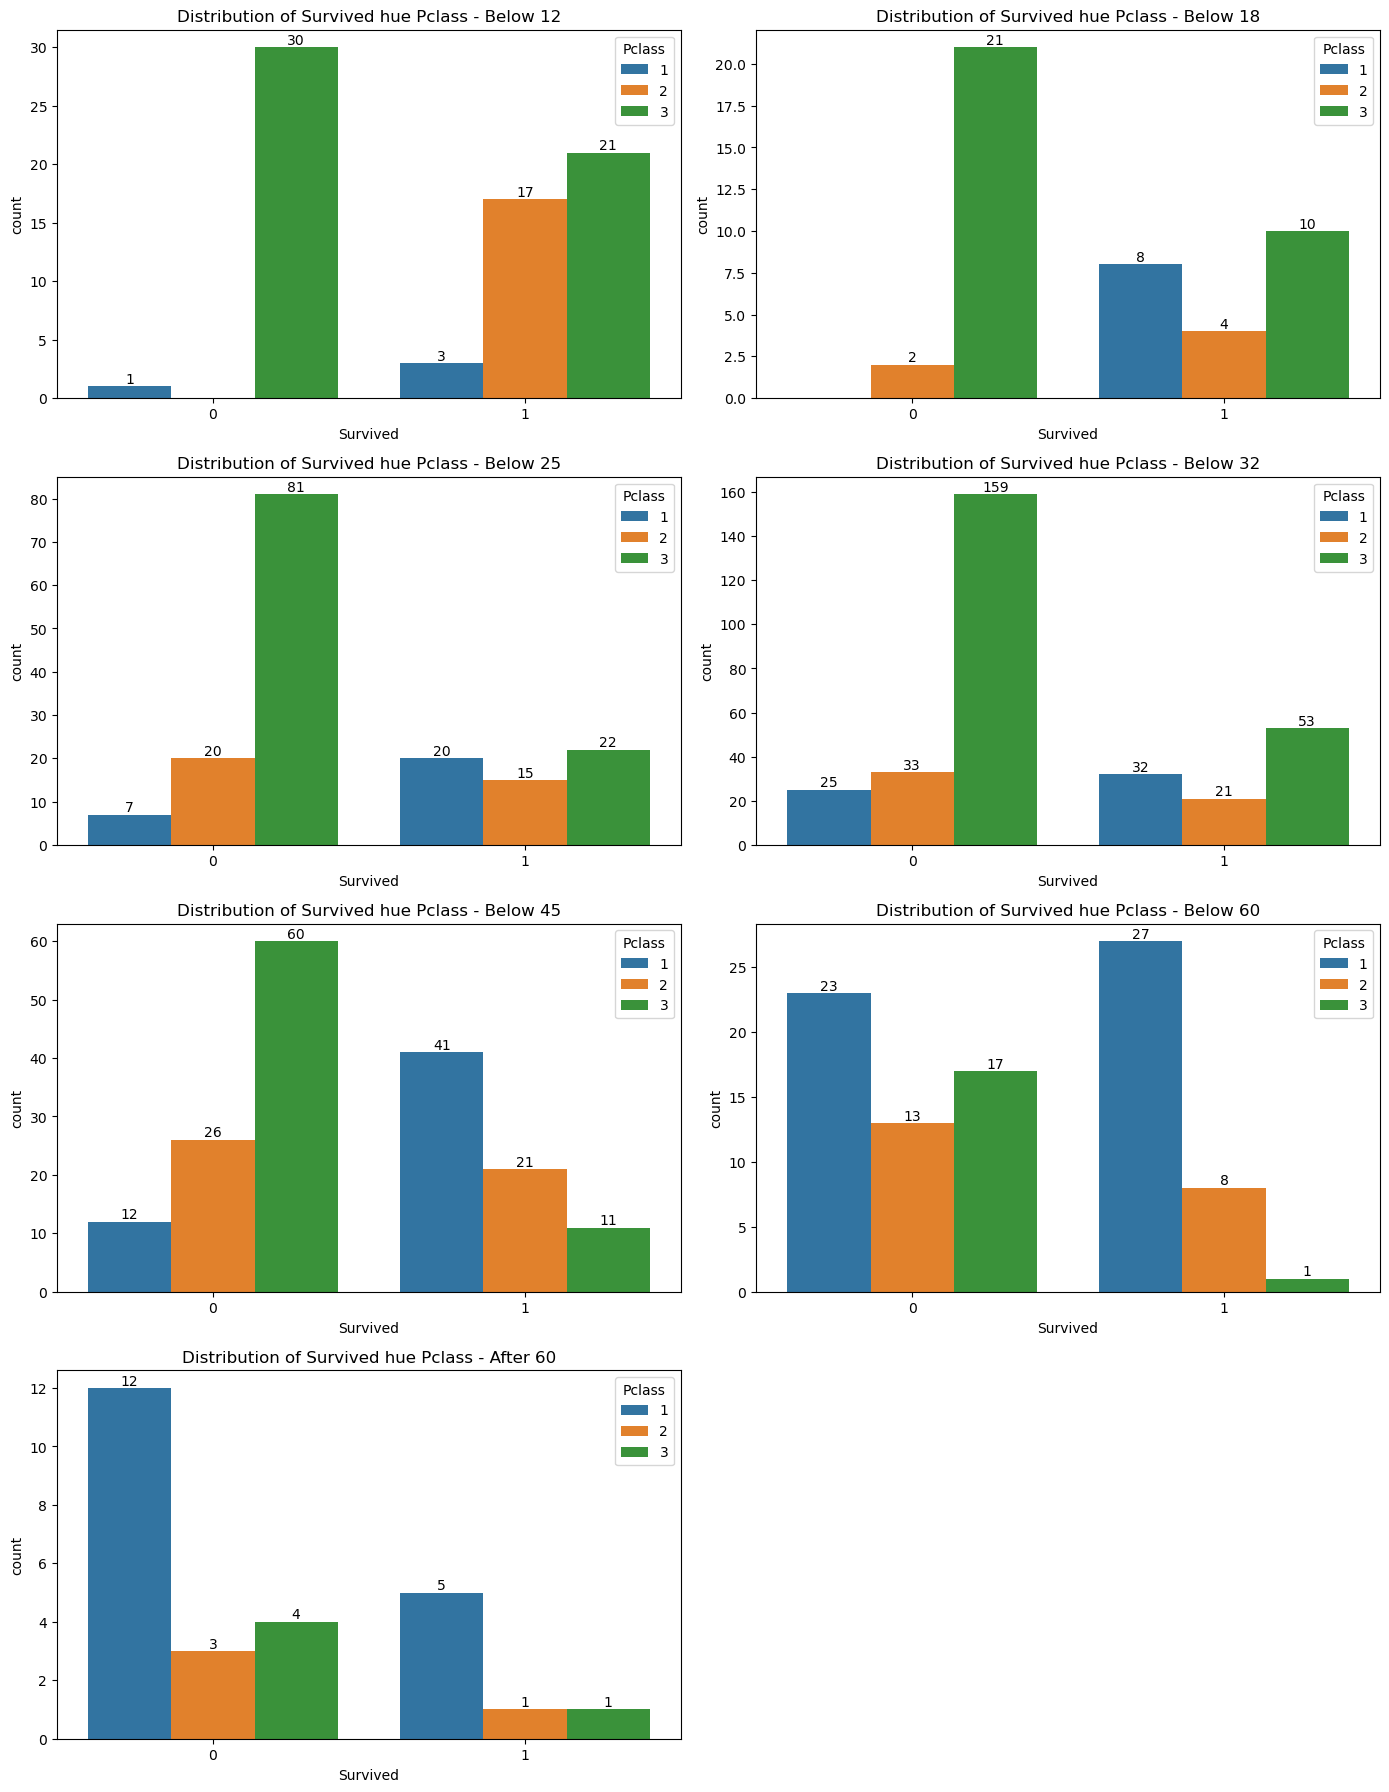

In [20]:
below_12 = df["Age"].apply(lambda x: x < 12)
below_18 = df["Age"].apply(lambda x: x < 18 and x >= 12)
below_25 = df["Age"].apply(lambda x: x < 25 and x >= 18)
below_32 = df["Age"].apply(lambda x: x < 32 and x >= 25)
below_45 = df["Age"].apply(lambda x: x < 45 and x >= 32)
below_60 = df["Age"].apply(lambda x: x < 60 and x >= 45)
after_60 = df["Age"].apply(lambda x: x >= 60)

df_list = [below_12, below_18, below_25, below_32, below_45, below_60, after_60]
names = ["Below 12", "Below 18", "Below 25", "Below 32", "Below 45", "Below 60", "After 60"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Pclass')
    plt.title(f'Distribution of Survived hue Pclass - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

#### Survivability base on size of family

We will do that later

#### Pairplot (Numeric variables)

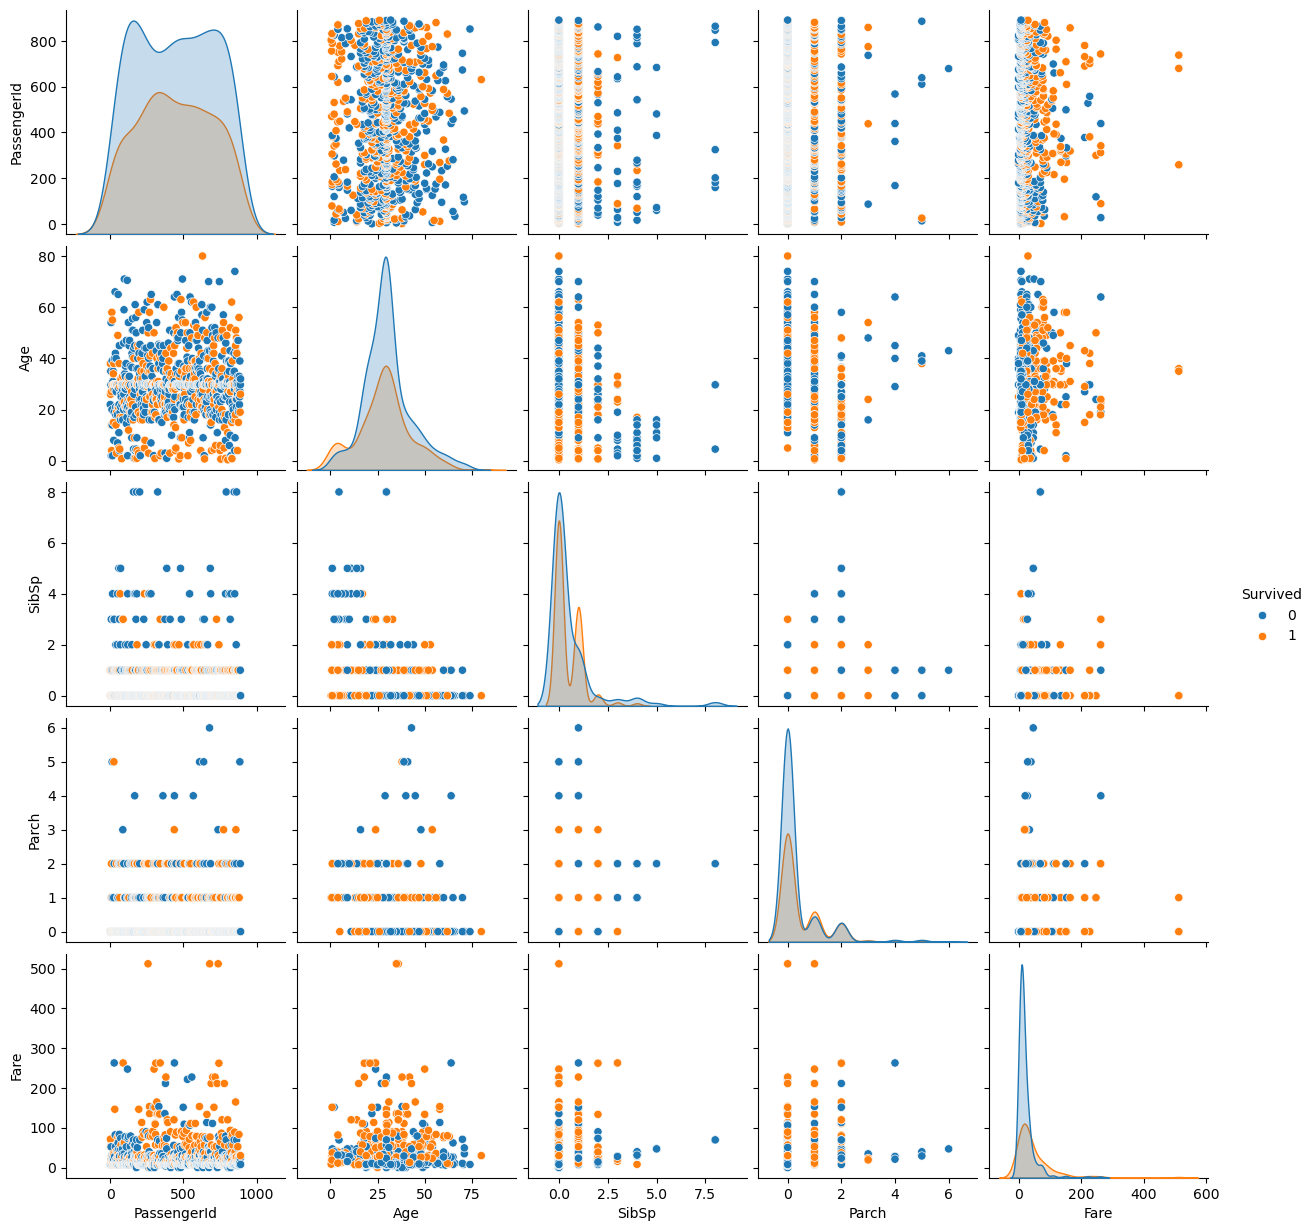

In [21]:
sns.pairplot(df, hue='Survived', diag_kind="kde")
plt.show()

#### Correlation heatmap

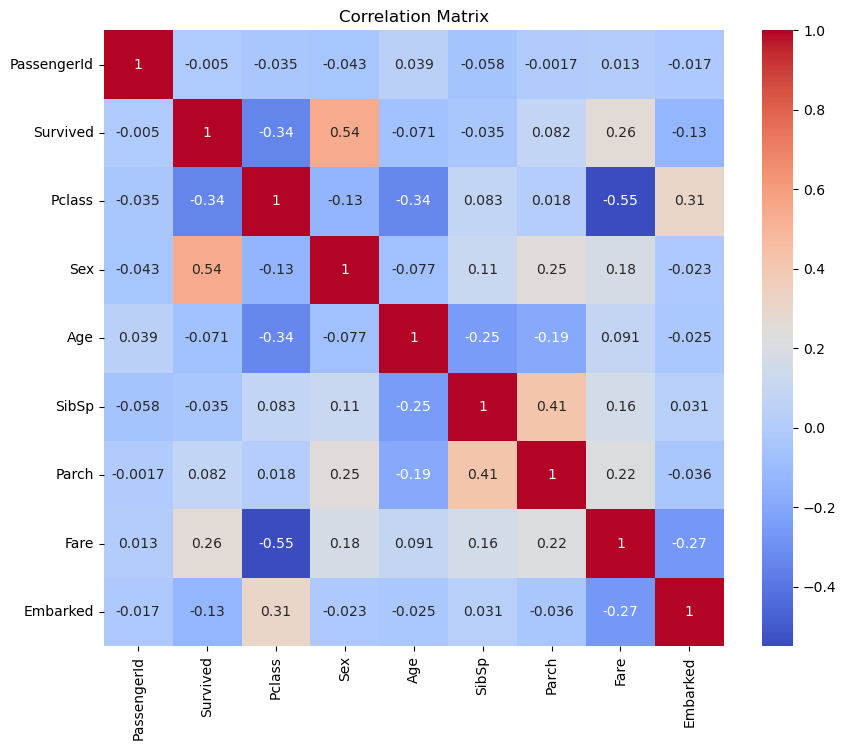

In [22]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['Name', 'Ticket'], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

There are some really standout information from this image:
- `PassengerId` did not have much impact on any other variable. We could consider remove it.
- `Sex` and `Pclass` are the two that have most impact on `Survived`.
- `Parch` and `SibSp` have high correlation.

## Detecting outliers

This section will mainly focus on addressing outlier values in numeric features.

Based on the outputs from the boxplot from EDA Analysis, we could see that `Age`, `Fare`, `SibSp`, and `Parch` features have outlier values. However, since `SibSp` and `Parch` features are not continuous (both features have a limited number of unique values), we will not handle outlier values in these two features, as it could affect negatively on the model.

To handle outlier values, IQR method is used to find the lower bound and upper bound, then replace outlier values with values within these bounds using techniques such as capping or imputation.

In [23]:
num_cols = ['Age', 'Fare']
def detect_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - factor * IQR, 0)  # Age cannot be negative
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # print(f'{col} - Outliers (IQR): {len(outliers)}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}')
    return outliers, lower_bound, upper_bound


for col in num_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    print(f'Total outliers in {col}: {len(outliers)}')

Total outliers in Age: 66
Total outliers in Fare: 116


Base on the outcome, we could see that:
- Total outliers in Age: 66
- Total outliers in Fare: 116

The number of outliers in `Fare` is quite high, we will have to handle it carefully in the next part.

## Feature Engineering

### Addressing outliers

There are some famous techniques to handle outlier values (removing outliers, transforming data, imputation,...). 

At first, I decided to use imputation technique to replace outlier values with median of the column, as median is not affected by outlier values. However, after implementing that, I found out that we cannot remove all outlier values in `Fare` feature, as the number of outliers is quite high (116 outliers, which is about 13% of total rows).

Because of that, I decided to generate new features: `Age_bin` and `Fare_bin`, which categorize `Age`and `Fare` into different groups using `pd.qcut()`. 

For `Age_bin`, I categorized it into 7 groups: below 12, 12-18, 19-25, 26-32, 33-45, 46-60, and after 60.

For `Fare_bin`, I categorized it into 9 groups: low_minus, low, low_plus, medium_minus, medium, medium_plus, high_minus, high, and high_plus.

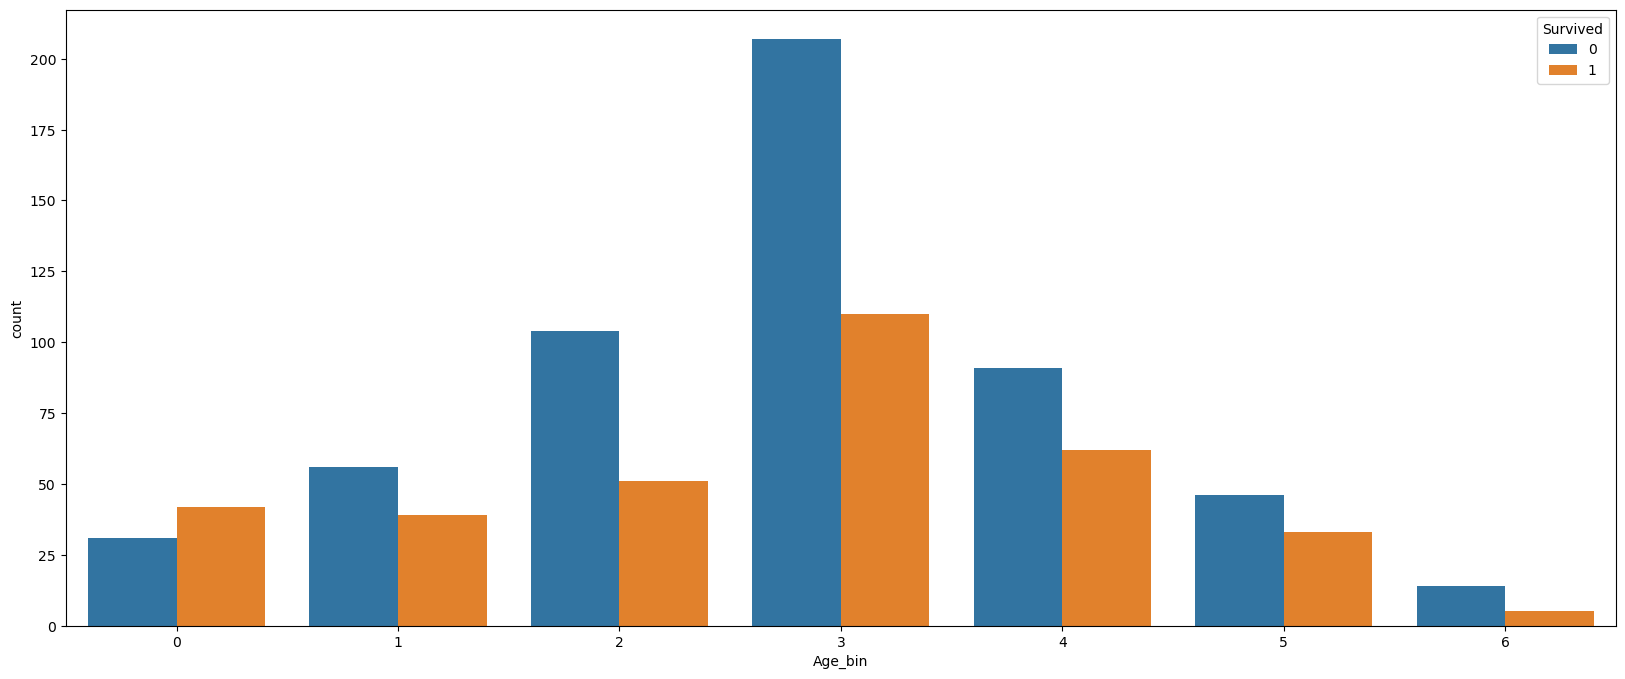

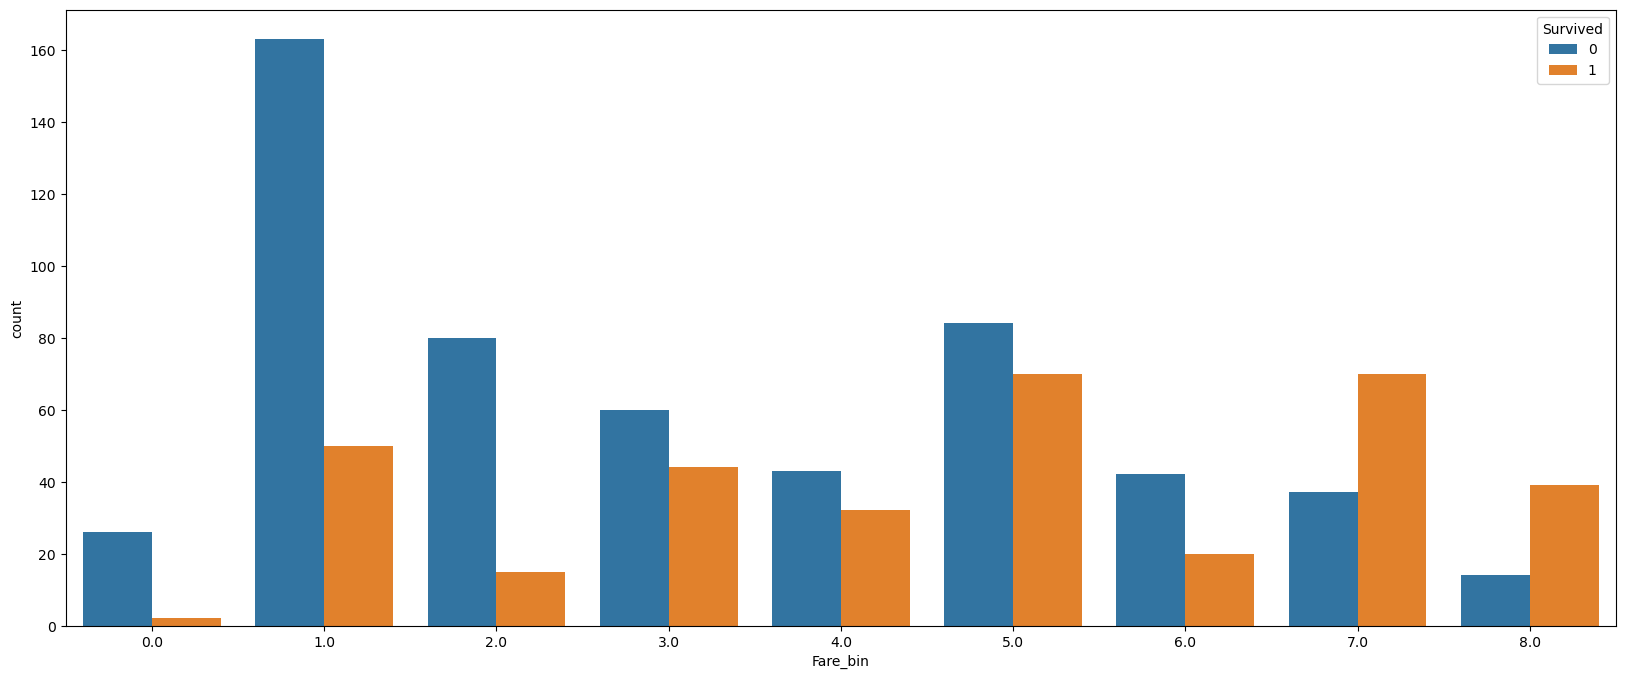

In [24]:
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 12, 19, 26, 33, 46, 61, 100], labels=False)
df['Age_bin'] = df['Age_bin'].astype('category')
df_test['Age_bin'] = pd.cut(df_test['Age'], bins=[0, 12, 19, 26, 33, 46, 61, 100], labels=False)
df_test['Age_bin'] = df_test['Age_bin'].astype('category')

fig, axs = plt.subplots(figsize=(20, 8))
sns.countplot(x='Age_bin', hue='Survived', data=df)
plt.show()

df['Fare_bin'] = pd.cut(df['Fare'], bins=[0, 7, 8, 10, 14.45, 20, 31, 50, 100, 1000000], labels=False)
df_test['Fare_bin'] = pd.cut(df_test['Fare'], bins=[0, 7, 8, 10, 14.45, 20, 31, 50, 100, 1000000], labels=False)

missing_fare_bin = df[df['Fare_bin'].isnull() & (df['Fare'] == 0.0)]
df.loc[missing_fare_bin.index, 'Fare_bin'] = 0

missing_fare_bin_test = df_test[df_test['Fare_bin'].isnull() & (df_test['Fare'] == 0.0)]
df_test.loc[missing_fare_bin_test.index, 'Fare_bin'] = 0

df['Fare_bin'] = df['Fare_bin'].astype('category')
df_test['Fare_bin'] = df_test['Fare_bin'].astype('category')

fig, axs = plt.subplots(figsize=(20, 8))
sns.countplot(x='Fare_bin', hue='Survived', data=df)
plt.show()

On Age_bin's distribution:
-   0: below 12
-   1: 12-18
-   2: 19-25
-   3: 26-32
-   4: 33-45
-   5: 46-60
-   6: 61 and above

On Fare_bin's distribution: 0, 7, 8, 10, 14.45, 20, 31, 50, 100, 1000000
-  0: low_minus (below 7)
-  1: low (7-8)
-  2: low_plus (8-10)
-  3: medium_minus (10-14.45)
-  4: medium (14.45-20)
-  5: medium_plus (20-31)
-  6: high_minus (31-50)
-  7: high (50-100)
-  8: high_plus (above 100)

We can see that in Age_bin:
- Group 0 (below 12) is the only group that the number of survivors is higher than that of non-survivors.
- Group 3 (26-32) has the highest number of passengers.
- Group 3 (26-32) has the lowest survival rate compared to other groups.

In Fare_bin:
- Group 1 (7-8) has the highest number of passengers.
- Generally, the higher the fare, the higher the survival rate.

#### Survivability of each group based on Age_bin and Fare_bin

In [25]:
# survivability of each group based on Age_bin and Fare_bin
for age_bin in sorted(df['Age_bin'].unique()):
    survived = df[df['Age_bin'] == age_bin][df['Survived'] == 1]
    survive_percentage = len(survived) / len(df[df['Age_bin'] == age_bin]) * 100
    print(f'Age_bin {age_bin}: {survive_percentage:.2f}% survived')

for fare_bin in sorted(df['Fare_bin'].unique()):
    survived = df[df['Fare_bin'] == fare_bin][df['Survived'] == 1]
    try:
        survive_percentage = len(survived) / len(df[df['Fare_bin'] == fare_bin]) * 100
    except ZeroDivisionError:
        survive_percentage = -1
    print(f'Fare_bin {fare_bin}: {survive_percentage:.2f}% survived')

Age_bin 0: 57.53% survived
Age_bin 1: 41.05% survived
Age_bin 2: 32.90% survived
Age_bin 3: 34.70% survived
Age_bin 4: 40.52% survived
Age_bin 5: 41.77% survived
Age_bin 6: 26.32% survived
Fare_bin 0.0: 7.14% survived
Fare_bin 1.0: 23.47% survived
Fare_bin 2.0: 15.79% survived
Fare_bin 3.0: 42.31% survived
Fare_bin 4.0: 42.67% survived
Fare_bin 5.0: 45.45% survived
Fare_bin 6.0: 32.26% survived
Fare_bin 7.0: 65.42% survived
Fare_bin 8.0: 73.58% survived


#### Check Pclass distribution in each Age_bin and Fare_bin

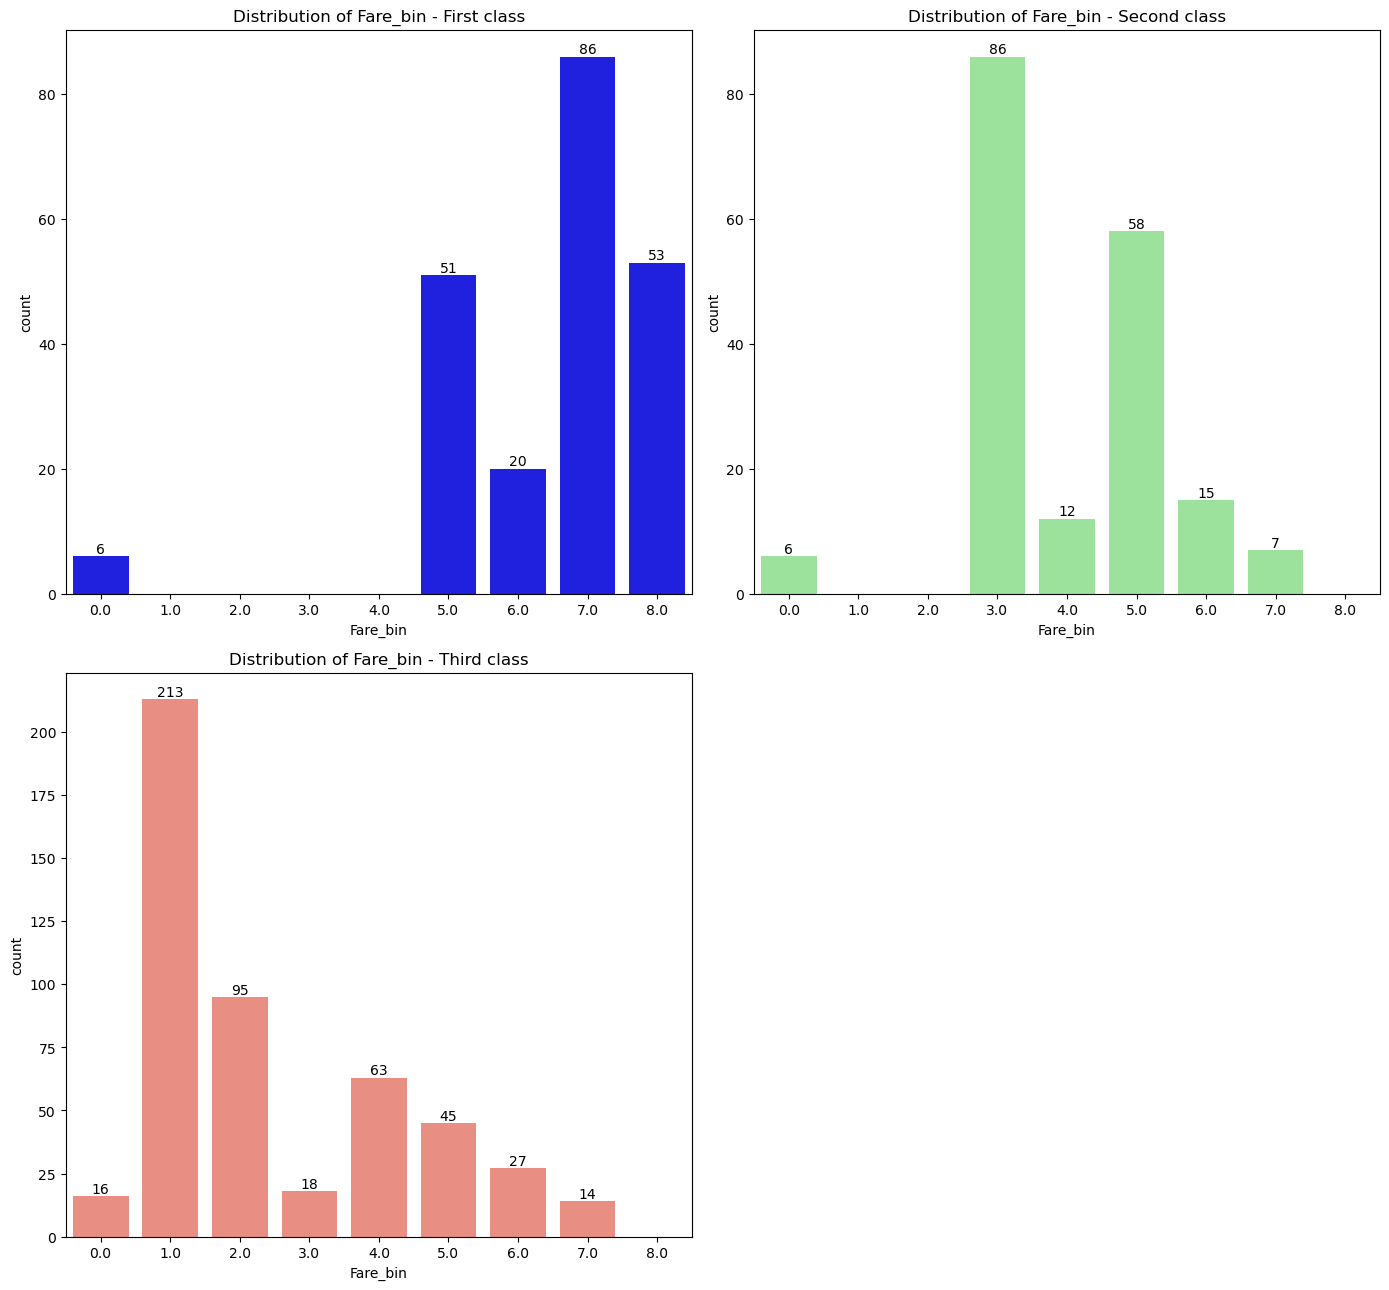

In [26]:
first_class = df["Pclass"].apply(lambda x: x == 1)
second_class = df["Pclass"].apply(lambda x: x == 2)
third_class = df["Pclass"].apply(lambda x: x == 3)

df_list = [first_class, second_class, third_class]
names = ["First class", "Second class", "Third class"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))

# each graph have specific color
colors = ['blue', 'lightgreen', 'salmon']
for idx, (feature, name, color) in enumerate(zip(df_list, names, colors), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Fare_bin', color=color)
    plt.title(f'Distribution of Fare_bin - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

Really interestingly, we could see that `Third class` passengers should be mostly in `low` and `medium` Fare_bin, while `First class` passengers should be mostly in `high` Fare_bin. But there are still some `Third class` passengers in `high` Fare_bin, which is quite strange.

In [27]:
df[df['Fare_bin'] == 7][df['Pclass'] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_bin,Fare_bin
74,75,1,3,"Bing, Mr. Lee",0,32.000000,0,0,1601,56.4958,1,3,7.0
159,160,0,3,"Sage, Master. Thomas Henry",0,4.574167,8,2,CA. 2343,69.5500,1,0,7.0
169,170,0,3,"Ling, Mr. Lee",0,28.000000,0,0,1601,56.4958,1,3,7.0
180,181,0,3,"Sage, Miss. Constance Gladys",1,29.699118,8,2,CA. 2343,69.5500,1,3,7.0
201,202,0,3,"Sage, Mr. Frederick",0,29.699118,8,2,CA. 2343,69.5500,1,3,7.0
324,325,0,3,"Sage, Mr. George John Jr",0,29.699118,8,2,CA. 2343,69.5500,1,3,7.0
509,510,1,3,"Lang, Mr. Fang",0,26.000000,0,0,1601,56.4958,1,2,7.0
643,644,1,3,"Foo, Mr. Choong",0,29.699118,0,0,1601,56.4958,1,3,7.0
692,693,1,3,"Lam, Mr. Ali",0,29.699118,0,0,1601,56.4958,1,3,7.0
792,793,0,3,"Sage, Miss. Stella Anna",1,29.699118,8,2,CA. 2343,69.5500,1,3,7.0


Having a look at this dataset, I realized that most of these passengers are actually families, since many passengers in this dataset had same family name, and the feature `SibSp` and `Parch` are quite high. The price that they had to pay for the tickets was likely influenced by their family size. Let's investigate the family size of the passengers to see if it has any impact on their survival.

### Family size

I decided to create a new feature `FamilySize`, which is the sum of `SibSp` and `Parch` plus 1 (the passenger itself).

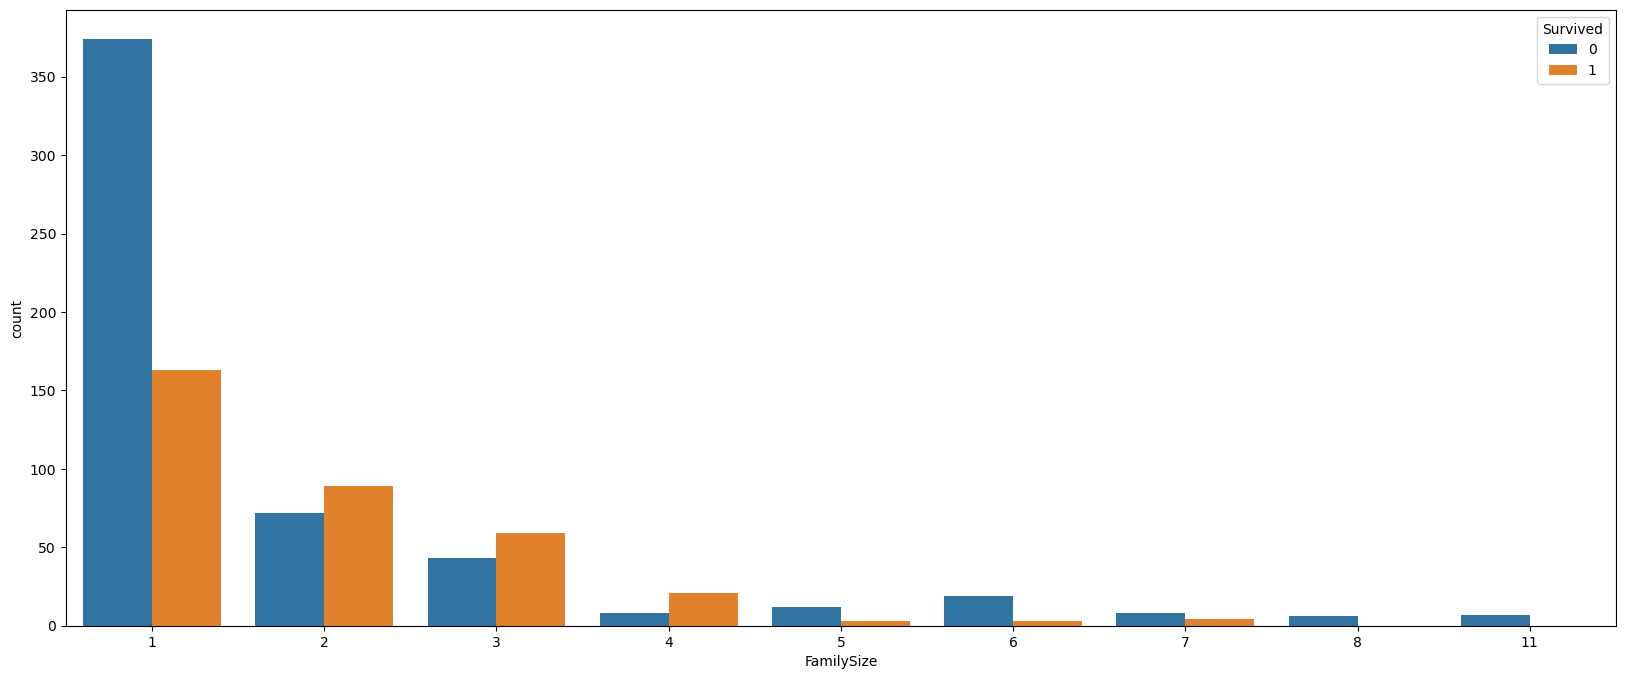

In [28]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
fig, axs = plt.subplots(figsize=(20, 8))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.show()

### Survivability base on FamilySize

In [29]:
for family_size in sorted(df['FamilySize'].unique()):
    survived = df[df['FamilySize'] == family_size][df['Survived'] == 1]
    survive_percentage = len(survived) / len(df[df['FamilySize'] == family_size]) * 100
    print(f'FamilySize {family_size}: {survive_percentage:.2f}% survived out of {len(df[df['FamilySize'] == family_size])} ({len(survived)} survived)')

FamilySize 1: 30.35% survived out of 537 (163 survived)
FamilySize 2: 55.28% survived out of 161 (89 survived)
FamilySize 3: 57.84% survived out of 102 (59 survived)
FamilySize 4: 72.41% survived out of 29 (21 survived)
FamilySize 5: 20.00% survived out of 15 (3 survived)
FamilySize 6: 13.64% survived out of 22 (3 survived)
FamilySize 7: 33.33% survived out of 12 (4 survived)
FamilySize 8: 0.00% survived out of 6 (0 survived)
FamilySize 11: 0.00% survived out of 7 (0 survived)


To make things clearer, I will group the dataset by creating new feature `FamilyGroup` based on `FamilySize`.
- Small: FamilySize = 1
- Medium: FamilySize = 2 - 4
- Large: FamilySize = 5 - 7
- Very Large: FamilySize >= 8

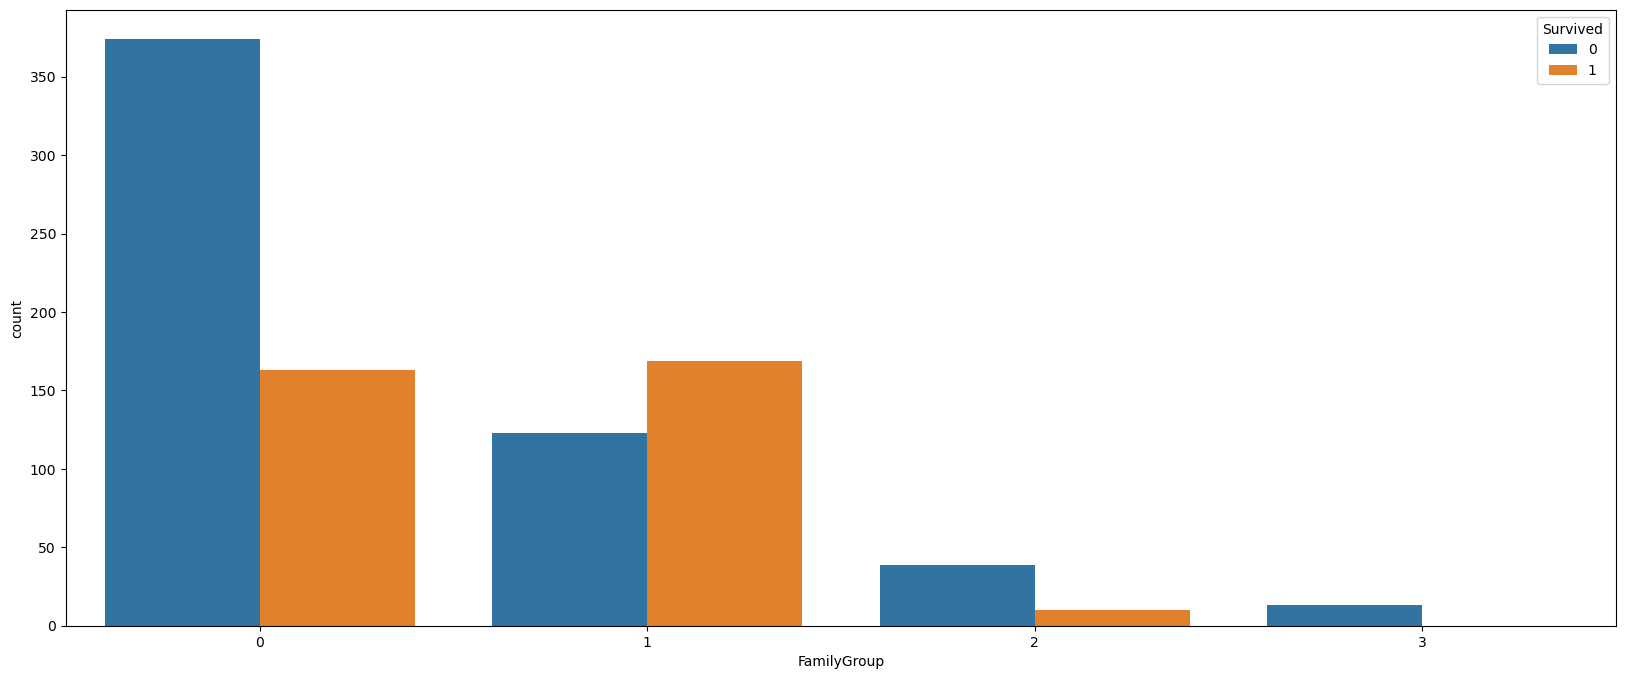

In [30]:
df['FamilyGroup'] = pd.cut(df['FamilySize'], bins=[0, 1, 4, 7, 20], labels=False)
df['FamilyGroup'] = df['FamilyGroup'].astype('category')

df_test['FamilyGroup'] = pd.cut(df_test['FamilySize'], bins=[0, 1, 4, 7, 20], labels=False)
df_test['FamilyGroup'] = df_test['FamilyGroup'].astype('category')

fig, axs = plt.subplots(figsize=(20, 8))
sns.countplot(x='FamilyGroup', hue='Survived', data=df)
plt.show()

In [31]:
for family_group in sorted(df['FamilyGroup'].unique()):
    survived = df[df['FamilyGroup'] == family_group][df['Survived'] == 1]
    survive_percentage = len(survived) / len(df[df['FamilyGroup'] == family_group]) * 100
    print(f'FamilyGroup {family_group}: {survive_percentage:.2f}% survived out of {len(df[df['FamilyGroup'] == family_group])} ({len(survived)} survived)')

FamilyGroup 0: 30.35% survived out of 537 (163 survived)
FamilyGroup 1: 57.88% survived out of 292 (169 survived)
FamilyGroup 2: 20.41% survived out of 49 (10 survived)
FamilyGroup 3: 0.00% survived out of 13 (0 survived)


From the result, we could see that:
- Alone passengers (FamilySize = 1) had a survival rate of 30.35% (163 out of 537).
- Small families (FamilySize = 2 - 4) had the highest survival rate of 57.88% (169 out of 292).
- Large families (FamilySize = 5 - 7) had a survival rate of 20.41% (10 out of 49).
- Very large families (FamilySize >= 8) had the lowest survival rate of 0% (0 out of 13).

## Feature Selection

In [32]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  Age_bin      891 non-null    category
 12  Fare_bin     891 non-null    category
 13  FamilySize   891 non-null    int64   
 14  FamilyGroup  891 non-null    category
dtypes: category(7), float64(2), int64(4), object(2)
memory usage: 63.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (to

Currently, there are 15 features in the dataset (including `Survived` feature). We will have to select the most important features to train the model. After some discussion, and some testing, we finally decided to remove the following features:

- PassengerId: No correlation with any other variable.
- Cabin: Too many missing values and we could not find a way to fill them.
- Name: Not useful for prediction.
- Ticket: Not useful for prediction. (Even if we could extract some information from Ticket, it would be too complicated and not worth the effort)
- Fare: High correlation with Fare_bin, we will keep Fare_bin only.
- SibSp and Parch: High correlation with FamilySize, we will keep FamilySize only.

For sure, these removed features could be a useful information for prediction, but for now, we will not use them to train the model.

In [33]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'FamilyGroup', 'SibSp', 'Parch'], axis=1) # remove these feature because 1. not analyze it yet and 2. have other things to show that features (Pclass instead of fare and cabin and ticket)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'FamilyGroup', 'SibSp', 'Parch'], axis=1)

In [34]:
# print all rows in df and df_test that have missing values
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    category
 3   Age         891 non-null    float64 
 4   Fare        891 non-null    float64 
 5   Embarked    891 non-null    category
 6   Age_bin     891 non-null    category
 7   Fare_bin    891 non-null    category
 8   FamilySize  891 non-null    int64   
dtypes: category(6), float64(2), int64(1)
memory usage: 27.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Sex         418 non-null    category
 2   Age         418 non-null    float64 
 3   Fare        418 non-null    float64 
 4   Embarked 

In [39]:
tmp_train = df.copy()
tmp_test = df_test.copy()

tmp_train['Sex'] = tmp_train['Sex'].cat.codes
tmp_test['Sex'] = tmp_test['Sex'].cat.codes

tmp_train['Embarked'] = tmp_train['Embarked'].cat.codes
tmp_test['Embarked'] = tmp_test['Embarked'].cat.codes

tmp_train.info()
tmp_test.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    category
 1   Pclass      891 non-null    category
 2   Sex         891 non-null    int8    
 3   Age         891 non-null    float64 
 4   Fare        891 non-null    float64 
 5   Embarked    891 non-null    int8    
 6   Age_bin     891 non-null    category
 7   Fare_bin    891 non-null    category
 8   FamilySize  891 non-null    int64   
dtypes: category(4), float64(2), int64(1), int8(2)
memory usage: 27.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    category
 1   Sex         418 non-null    int8    
 2   Age         418 non-null    float64 
 3   Fare        418 non-null    float64 
 4   

In [40]:
df = tmp_train.copy()
df_test = tmp_test.copy()

## Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

df_input = df.drop(['Survived'], axis=1)
df_outcome = df['Survived']

# Prepare input and output
X = df_input
y = df_outcome.astype(int)  # Ensure target is integer

# Split data
# Try multiple models and compare their performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: Validation Accuracy = {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Use the best model for further prediction
model = models[best_model_name]

# Train model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Save model to file
joblib.dump(model, "titanic_random_forest_model_v8.joblib")
print("Model saved to titanic_random_forest_model_v8.joblib")

Logistic Regression: Validation Accuracy = 0.8060
Decision Tree: Validation Accuracy = 0.7612
Random Forest: Validation Accuracy = 0.8022
Gradient Boosting: Validation Accuracy = 0.8209
AdaBoost: Validation Accuracy = 0.7948
SVC: Validation Accuracy = 0.6567
KNN: Validation Accuracy = 0.7052
Naive Bayes: Validation Accuracy = 0.7799

Best model: Gradient Boosting with accuracy 0.8209
Validation Accuracy: 0.8209
Model saved to titanic_random_forest_model_v8.joblib


## Hyperparameter Tunning

In [42]:
# Add these cells after your model selection code

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming 'model' is the best model from your selection
best_model = model

# Define param_grids for each possible model
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "SVC": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    "Naive Bayes": {}  # No hyperparameters to tune for GaussianNB
}

# Get the param_grid for the best model
model_name = best_model_name  # From your earlier code
if model_name in param_grids:
    param_grid = param_grids[model_name]
    if param_grid:  # Only tune if there are params
        grid_search = RandomizedSearchCV(
            estimator=best_model,
            param_distributions=param_grid,
            cv=10,
            scoring='accuracy',
            n_jobs=-1,
            verbose=2
        )
        grid_search.fit(X_train, y_train)
        tuned_model = grid_search.best_estimator_
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
    else:
        tuned_model = best_model  # No tuning needed
        print("No hyperparameters to tune for this model.")
else:
    tuned_model = best_model
    print("Param grid not defined for this model.")

# Evaluate tuned model
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Validation Accuracy: {accuracy_tuned:.4f}")

# Save tuned model
joblib.dump(tuned_model, f"titanic_tuned_{model_name.lower().replace(' ', '_')}_model_v8.joblib")
print(f"Tuned model saved as titanic_tuned_{model_name.lower().replace(' ', '_')}_model_v8.joblib")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.01}
Best CV score: 0.8330
Tuned Model Validation Accuracy: 0.8134
Tuned model saved as titanic_tuned_gradient_boosting_model_v8.joblib


## Evaluate performance

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model performance on test set
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[144  13]
 [ 35  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       157
           1       0.85      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



## Prediction on test sets

In [44]:
# Drop columns not used in training
X_submit = df_test

submit_pred = model.predict(X_submit)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'PassengerId': test_dataset['PassengerId'],
    'Survived': submit_pred.astype(int)
})

# Export to CSV
submission.to_csv('submit_prediction_v8.csv', index=False)
print("Prediction file saved as submit_prediction_v8.csv")

Prediction file saved as submit_prediction_v8.csv


# The end